In [24]:
from scripts import project_functions
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks",font_scale=1.3)
url = 'https://raw.githubusercontent.com/data301-2020-winter1/course-project-solo_116/main/data/raw/PatientInfo.csv'
df = project_functions.load_and_process(url)

# Research Question
---
<blockquote>What is the mortality rate for different infected age groups in the dataset and what impact does age have on mortality rates?</blockquote>

---

# EDA Visualization
---

In [25]:
# EDA visualization 1
df1 = (
    df.drop(columns = ['confirmed_date', 'released_date', 'patient_id'])
)
df1.describe(include = 'all')

,sex,approximate_age,infected_by,contact_number,deceased_date,state
count,3936,3780,1106,781,66,3937
unique,2,11,509,86,39,3
top,female,20,2000000205,3,2020-02-23,released
freq,2158,898,51,95,4,2508


## Observations
<ol> <li>It is interesting that the most frequent age of infected individuals is approximately 20</li>
    <li>There were more females infected than males</li>
    <li>51 of the people in this date set were infected by patient 2000000205</li>
    <li>4 people were announced deceased from this dataset on March 4th 2020</li>
    <li>Of the 3937 people in the dataset, 2508 were stated to be released</li></ol>
    <blockquote>These observations show helpful statistics, such as most frequent age and sex of infection, which will be compared with the final mortality rates to further understand what the data is saying. </blockquote>

Text(0.5,1,'Patient State by Age')

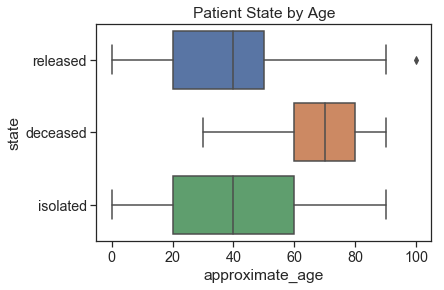

In [26]:
# EDA visualization 2
df2 = (
    df1.drop(columns = [ 'infected_by', 'contact_number', 'deceased_date'])
    .dropna(subset = ['state', 'approximate_age'])
)
df2['approximate_age'] = df2['approximate_age'].astype(int)
sns.boxplot(x = 'approximate_age', y = 'state', data = df2).set_title("Patient State by Age")

## Observations
<ol>
    <li>The average approximate age for released and isolated cases appears to be relatively the same</li>
    <li>The average approximate age for deceased patients is approximately 70</li>
    <li>The variance of the approximate age for deceased patients does not go any lower than about 30</li></ol>
    <blockquote>These observations describe the average ages of released, deceased and isolated patients, which gives an idea of the answer to the research question. </blockquote>

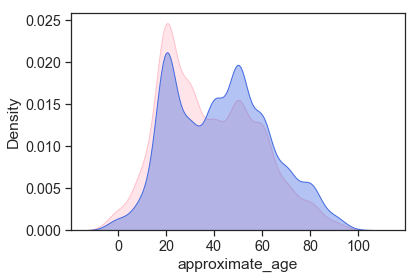

In [27]:
# EDA visualization 3
M = df2[df2["sex"]=="male"]
F = df2[df2["sex"]=="female"]

X1 = M["approximate_age"].dropna()
X2 = F["approximate_age"].dropna()
L1=sns.kdeplot(X1, shade=True, label="male", color="pink", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="female",color='royalblue', alpha=0.4)

## Observations
<ol>
    <li>There are more younger female patients and more older male patients</li>
    <li>The majority of patients, both male and female are approximately 20, or approximately 50</li></ol>
    <blockquote>These observations help to show how sex is related to infection, contextualizing who is being infected in each age group and which age groups have been most affected. </blockquote>

# Analysis
---

In [42]:
# Analysis
df4=df2.drop(columns='sex')
df4['count_of_patients_by_age']=1
df4 = df4.pivot_table('count_of_patients_by_age', index = 'approximate_age', columns = 'state', aggfunc='sum').fillna(0)
df4['total_patients']=df4.sum(axis=1)
df5 = df4
df4 = df4.drop(columns = ['isolated', 'released'])
def f(x):
    return x[0]/x[1]*100
df4['mortality_rate_as_percentage']=df4.apply(f,axis=1) 
df4 # This dataframe includes the mortality rates of different approximate ages, as well as the total patients of that age and the total deceased patients of that age

state,deceased,total_patients,mortality_rate_as_percentage
approximate_age,,,
0,0.0,65.0,0.000000
10,0.0,177.0,0.000000
20,0.0,898.0,0.000000
30,1.0,523.0,0.191205
40,2.0,516.0,0.387597
50,7.0,667.0,1.049475
60,12.0,482.0,2.489627
70,21.0,232.0,9.051724
80,25.0,170.0,14.705882


Text(0.5,1,'Mortality rates of South Korean Covid Patients from Jan to June 2020 by Age')

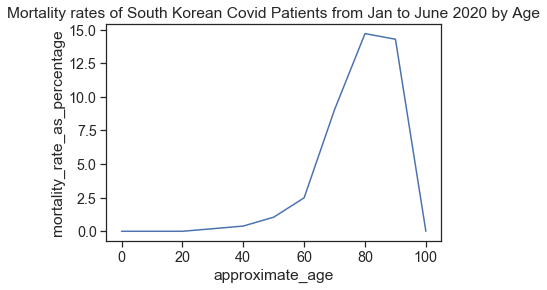

In [29]:
sns.lineplot(data=df4, x='approximate_age', y='mortality_rate_as_percentage').set_title("Mortality rates of South Korean Covid Patients from Jan to June 2020 by Age")
# Note: This could be expanded to more datasets of different countries on the same plot, having each line a different country

## Observations
<ol><li>As age increases, the mortality rate also increases showing that age is directly related to mortality rates</li>
    <li>Approximately an eight of the patients who were ~80 years old were deceased</li></ol>
    <blockquote>This data confirms that age is related to mortality rates with respect to COVID-19, and will be used to directly confirm or deny the research question. </blockquote>

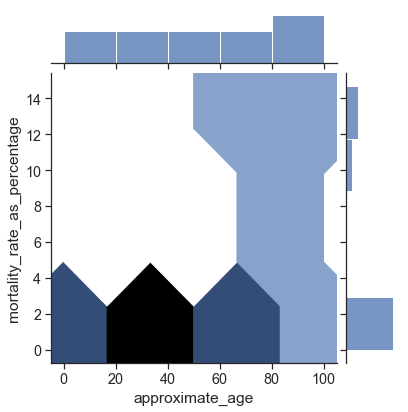

In [30]:
sns.jointplot(data=df4, x='approximate_age', y='mortality_rate_as_percentage', kind = 'hex')
# Shows the denstities of mortality among age groups

<blockquote>This plot shows the distribution of mortality rates among age groups and is used to further support the conclusions of this project. </blockquote>

Text(0.5,1,'Mortality rates of South Korean Covid Patients from Jan to June 2020 by Age')

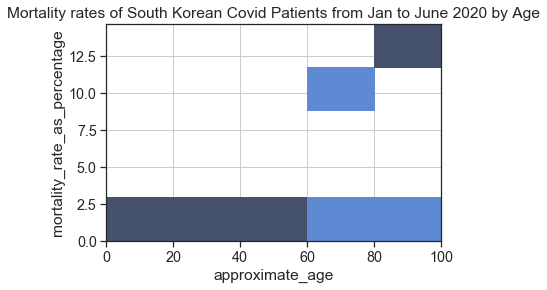

In [31]:
sns.histplot(data=df4, x='approximate_age', y='mortality_rate_as_percentage').set_title("Mortality rates of South Korean Covid Patients from Jan to June 2020 by Age")


<blockquote>This plot expands on the joint plot above, adding further confidence to the conclusions of the project. </blockquote>

In [43]:
# exporting dataframe to csv in processed folder
df4['released']=df5['released'].astype(str)
#df4.to_csv(r"C:\Users\jesse\Desktop\Files\Cosc_301\Cosc 301 Project\course-project-solo_116\data\processed\processed_dataframe3.csv", index=False,header=True)
df4

state,deceased,total_patients,mortality_rate_as_percentage,released
approximate_age,,,,
0,0.0,65.0,0.000000,35.0
10,0.0,177.0,0.000000,114.0
20,0.0,898.0,0.000000,663.0
30,1.0,523.0,0.191205,332.0
40,2.0,516.0,0.387597,369.0
50,7.0,667.0,1.049475,457.0
60,12.0,482.0,2.489627,294.0
70,21.0,232.0,9.051724,133.0
80,25.0,170.0,14.705882,80.0
